$Team Number$: GS2
<br>
$Project$: Climate Change Impact Analysis 
<br>
$Professor$: DR. GAURAV SAXENA
<br>
$Team Members$: Quazi Fuzail, Priyanshi Bhatnagar,Shivam Swaraj,Stuti Jain 
<br>
$Roll number$: 211B233, 211B228, 211B292,211B319

## Problem Statement

1. Rising global temperatures and extreme weather events are intensifying due to climate change.

2. The complexity of climate systems makes accurate impact prediction challenging.

3. The urgent need for detailed data analysis and evidence-based strategies to address the far-reaching consequences of climate change.


## Goals

• Collection of relevant data
<br>
• Pre-processing of data
<br>
• Visualization and analysis of different factors that affect global warming
<br>
• Statistical modelling of significant components of climate change
<br>
• Forecasting model to predict future values of the critical factors
<br>
• Performance Evaluation

## Factors affecting Global Warming

1. Emission of Gases like Co2, N2O and CH4
<br>
2. Fossil Fuels and Industrial
<br>
3. Agricultural waste and Forest Burning

In [1]:
import pandas as pd
from pmdarima import auto_arima
import plotly.graph_objects as go
import chart_studio.plotly as ply
import cufflinks as cf
cf.go_offline()
import plotly.express as px
from copy import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import plotly.offline as py
import plotly.express as px

In [2]:
csv_file = (r'Dataset/GlobalLandTemperaturesByCountry.csv')

In [3]:
data = pd.read_csv(csv_file)
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
countries = data['Country'].unique().tolist()
countries

['Åland',
 'Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua And Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Baker Island',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bonaire, Saint Eustatius And Saba',
 'Bosnia And Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 "Côte D'Ivoire",
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Colombia',
 'Comoros',
 'Congo (Democratic Republic Of The)',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Republic',
 'Denmark (Europe)',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial G

In [5]:
# get the mean temp for each country
mean_temp = []
for i in countries:
    mean_temp.append(data[data.Country == i]['AverageTemperature'].mean())

In [6]:
#@title
# plot the mean temperature of countries 

element_map = [ dict(type = 'choropleth', # type of map
              locations = countries, # location names
              z = mean_temp, # temperature of countries
              locationmode = 'country names')
       ]

layout = dict(title = 'Average Global Temperatures',
              geo = dict(showframe = False,
                         showocean = True, 
                         oceancolor = 'blue',
                         projection = dict(type = 'orthographic'),
                         lonaxis = dict(showgrid=True, gridcolar='black'),
                         lataxis = dict(showgrid=True, gridcolar = 'black'))) 

fig = dict(data = element_map, layout = layout)
py.iplot(fig, validate = False, filename = 'worldmap')

### Analysis  & Forescasting of emissions data

In [7]:
df_emissions_data = pd.read_csv(r"Dataset/rcmip-concentrations-annual-means-world-ssp370-v5-1-0.csv") 

In [8]:
df_emissions_data.head()

,Model,Scenario,Region,Variable,Unit,Activity_Id,Mip_Era,1750,1751,1752,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,AIM,ssp370,World,Atmospheric Concentrations|CH4,ppb,input4MIPs,CMIP6,731.405996,731.838165,732.899974,...,1939.940063,1939.760050,1939.580058,1939.390066,1939.210052,1939.030050,1938.860036,1938.680064,1938.500061,1938.410055
1,AIM,ssp370,World,Atmospheric Concentrations|CO2,ppm,input4MIPs,CMIP6,277.147003,277.188001,277.229001,...,1375.360006,1374.860026,1374.359985,1373.860006,1373.359996,1372.869985,1372.369995,1371.869985,1371.380005,1371.130005
2,AIM,ssp370,World,Atmospheric Concentrations|F-Gases|HFC|HFC125,ppt,input4MIPs,CMIP6,0.000000,0.000000,0.000000,...,0.008620,0.008293,0.007979,0.007677,0.007386,0.007106,0.006837,0.006578,0.006328,0.006206
3,AIM,ssp370,World,Atmospheric Concentrations|F-Gases|HFC|HFC134a,ppt,input4MIPs,CMIP6,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,AIM,ssp370,World,Atmospheric Concentrations|F-Gases|HFC|HFC143a,ppt,input4MIPs,CMIP6,0.000000,0.000000,0.000000,...,0.513955,0.502173,0.490660,0.479412,0.468422,0.457683,0.447191,0.436939,0.426923,0.421972


### Extracting the columns having emission values of Co2,CH4,N20

In [9]:
df_Co2_CH4 = df_emissions_data.loc[0:1,:]
df_N2o = df_emissions_data.loc[42:42, :]

In [10]:
df_combined = df_Co2_CH4.append(df_N2o)
df_combined.head()

C:\Users\Quazi Fuzail\AppData\Local\Temp\ipykernel_31992\3126220900.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Model,Scenario,Region,Variable,Unit,Activity_Id,Mip_Era,1750,1751,1752,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,AIM,ssp370,World,Atmospheric Concentrations|CH4,ppb,input4MIPs,CMIP6,731.405996,731.838165,732.899974,...,1939.940063,1939.760050,1939.580058,1939.390066,1939.210052,1939.030050,1938.860036,1938.680064,1938.500061,1938.410055
1,AIM,ssp370,World,Atmospheric Concentrations|CO2,ppm,input4MIPs,CMIP6,277.147003,277.188001,277.229001,...,1375.360006,1374.860026,1374.359985,1373.860006,1373.359996,1372.869985,1372.369995,1371.869985,1371.380005,1371.130005
42,AIM,ssp370,World,Atmospheric Concentrations|N2O,ppb,input4MIPs,CMIP6,273.865051,273.894056,273.927055,...,515.906993,515.919978,515.931992,515.944977,515.956980,515.968989,515.980993,515.992976,516.004990,516.010991


In [11]:
df_combined = df_combined.drop(["Model", "Scenario", "Region", "Variable", "Unit", "Activity_Id","Mip_Era"],axis=1)

In [12]:
df_combined.head()

,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,731.405996,731.838165,732.899974,733.634038,734.202021,734.736079,735.421000,735.893031,736.206996,736.098887,...,1939.940063,1939.760050,1939.580058,1939.390066,1939.210052,1939.030050,1938.860036,1938.680064,1938.500061,1938.410055
1,277.147003,277.188001,277.229001,277.263000,277.304003,277.351003,277.389000,277.441999,277.489001,277.539998,...,1375.360006,1374.860026,1374.359985,1373.860006,1373.359996,1372.869985,1372.369995,1371.869985,1371.380005,1371.130005
42,273.865051,273.894056,273.927055,273.973055,274.016045,274.051043,274.079051,274.096051,274.129046,274.165047,...,515.906993,515.919978,515.931992,515.944977,515.956980,515.968989,515.980993,515.992976,516.004990,516.010991


In [13]:
def create_df(value):
    cols = ["Year" , "Value"]
    df_temp = pd.DataFrame(columns = cols)
    df_temp_forecastGT = pd.DataFrame(columns = cols)
    k =0 
    c=0
    for i, row in df_combined.iterrows():
        if i == value:
            for j,val in row.iteritems():
                if int(j) > 2020 :
                    df_temp_forecastGT.loc[c,"Year"] = j
                    df_temp_forecastGT.loc[c,"Value"] = val
                    c=c+1

                else:
                    df_temp.loc[k,"Year"] = j
                    df_temp.loc[k,"Value"] = val
                    k+=1
    return df_temp,df_temp_forecastGT

In [15]:
def plot(df, name):
    df= df.set_index('Year')
    df.iplot(title=name, categoryorder = "category ascending")

In [16]:
fig_emissions = go.Figure()
df_Co2, df_Co2_forecastGT = create_df(0)
df_CH4, df_CH4_forecastGT = create_df(1)
df_N2O, df_N2O_forecastGT = create_df(42)

fig_emissions.add_trace(
            go.Scatter(x = df_Co2["Year"].to_list() ,y = df_Co2["Value"].to_list(),name="CO2")
            )
fig_emissions.add_trace(
            go.Scatter(x = df_CH4["Year"].to_list() ,y = df_CH4["Value"].to_list(),name="CH4")
            )
fig_emissions.add_trace(
            go.Scatter(x = df_N2O["Year"].to_list() ,y = df_N2O["Value"].to_list(),name="N2O")
            )
fig_emissions.update_layout(title="GreenHouse Gases Emissions",xaxis_title="Year",yaxis_title="Emission Value",legend_title="Type",font=dict(family="Courier New, monospace",size=10,color="RebeccaPurple"))

#### As per above plots, we observed the emissions data is of type time-series with upward trend.

Now, let's model the time-series data using ARIMA model to forecast future values.

In [17]:
def build_model_and_forecast(df,df_forecastGT, name):
    df= df.set_index('Year')
    stepwise_model = auto_arima(df, start_p=1, start_q=1,
                               max_p=3, max_q=3, m=12,
                               start_P=0, seasonal=True,
                               d=1, D=1, trace=True,
                               error_action='ignore',  
                               suppress_warnings=True, 
                               stepwise=True)
    print("AIC Value " ,stepwise_model.aic())
    train = df["1750":]
    test = df_forecastGT.loc["2021":"2060"]
    stepwise_model.fit(train)
    future_forecast = stepwise_model.predict(n_periods=40)
    print(future_forecast)
    future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["Prediction"])
    pd.concat([test,future_forecast],axis=1).iplot(title = name, categoryorder = "category ascending")

In [18]:
for i, row in df_combined.iterrows():
    fig_emissions = go.Figure()
    if i == 0:
        df_Co2, df_Co2_forecastGT = create_df(i)
#         plot(df_Co2,"CO2 Concentration" )
        fig_emissions.add_trace(
            go.Scatter(x = df_Co2["Year"].to_list() ,y = df_Co2["Value"].to_list(),name="CO2")
            )
        df_Co2_forecastGT= df_Co2_forecastGT.set_index('Year')
        build_model_and_forecast(df_Co2, df_Co2_forecastGT, "CO2 Forecasting")
        
    elif i == 1:
        df_CH4, df_CH4_forecastGT = create_df(i)
#         plot(df_CH4, "CH4 Concentration" )
        fig_emissions.add_trace(
            go.Scatter(x = df_CH4["Year"].to_list() ,y = df_CH4["Value"].to_list(),name="CH4")
            )
        df_CH4_forecastGT= df_CH4_forecastGT.set_index('Year')
        build_model_and_forecast(df_CH4, df_CH4_forecastGT,"CH4 Forecasting")
        
    elif i == 42:
        df_N2O, df_N2O_forecastGT = create_df(i)
#         plot(df_N2O, "N2O Concentration" ) 
        
        df_N2O_forecastGT= df_N2O_forecastGT.set_index('Year')
        build_model_and_forecast(df_N2O, df_N2O_forecastGT,"N2O Forecasting")
    
        
        

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1096.287, Time=0.56 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1474.391, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1141.850, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1268.251, Time=0.13 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1156.712, Time=0.05 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1096.713, Time=0.30 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1095.485, Time=0.52 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1089.899, Time=0.94 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=inf, Time=2.06 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=1090.321, Time=0.62 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1237.189, Time=0.55 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=1088.228, Time=0.67 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=1093.711, Time=0.40 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1094.776, Time=0.26 sec
 ARIMA(1,1,0)(2,1,2)[12]

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.82 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=311.789, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=199.524, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=198.860, Time=0.14 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=225.111, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=200.184, Time=0.23 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=199.031, Time=0.33 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=201.812, Time=0.12 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=190.415, Time=0.80 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=186.172, Time=1.11 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=197.781, Time=0.57 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.92 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=94.173, Time=2.23 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=95.723, Time=1.64 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-246.035, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-437.937, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-368.062, Time=0.32 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-396.974, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-471.301, Time=0.39 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=-480.811, Time=1.39 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-480.600, Time=0.40 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=-479.725, Time=1.68 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=-479.252, Time=1.49 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=-254.002, Time=0.81 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=-492.162, Time=2.12 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=-492.411, Time=0.82 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(2,1,0)(1,1,0)[12]     

### CO2 Emissions across different Sectors

In [19]:
df_CO2_fossil_industry = pd.read_csv(r"Dataset/Total_Fossil_Industy.csv")

In [20]:
df_CO2_fossil_industry.head()

,Year,Fossil and Industrial
0,1750,9.505620
1,1751,9.505963
2,1752,9.510002
3,1753,9.510345
4,1754,9.514384


In [21]:
df_CO2_fossil_industry.tail()

,Year,Fossil and Industrial
266,2016,35702.1833
267,2017,35807.3679
268,2018,36456.9087
269,2019,36908.1024
270,2020,37388.1289


In [22]:
df_CO2_agriculture_forest = pd.read_csv(r"Dataset/Total_Agriculture_forest.csv")

In [23]:
df_CO2_agriculture_forest.head()

,Year,Agriculture Waste and Forest Burining
0,1750,297.464607
1,1751,302.937098
2,1752,308.510269
3,1753,314.185969
4,1754,319.966086


In [24]:
df_CO2_agriculture_forest.tail()

,Year,Agriculture Waste and Forest Burining
266,2016,3653.314500
267,2017,3712.513000
268,2018,3815.198000
269,2019,3545.549800
270,2020,3259.400999


In [25]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x = df_CO2_fossil_industry["Year"].to_list() ,y = df_CO2_fossil_industry["Fossil and Industrial"].to_list(),name="Fossil and Industrial")
    )
fig.add_trace(
    go.Scatter(x = df_CO2_agriculture_forest["Year"].to_list(),y = df_CO2_agriculture_forest["Agriculture Waste and Forest Burining"].to_list(),name="Agriculture Waste and Forest Burining")
)
fig.update_layout(title="CO2 Emissions by Sector",xaxis_title="Year",yaxis_title="Emission Value",legend_title="Sector",font=dict(family="Courier New, monospace",size=10,color="RebeccaPurple"))

In [26]:
import pandas as pd
df_sectors_2 = pd.read_csv(r"Dataset/CO2_global_CEDS_emissions_by_fuel_2021_04_21.csv", on_bad_lines='skip', lineterminator='\n')
df_sectors_2.head()

,fuel,em,units,X1750,X1751,X1752,X1753,X1754,X1755,X1756,...,X2010,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X2018,X2019
0,biomass,CO2,ktCO2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,brown_coal,CO2,ktCO2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.473192e+05,7.867700e+05,7.787084e+05,7.362840e+05,7.196863e+05,7.207185e+05,7.154591e+05,7.182963e+05,7.410650e+05,6.987816e+05
2,coal_coke,CO2,ktCO2,366.177444,366.177444,366.320930,366.320930,366.464417,366.607903,391.861520,...,4.246643e+05,4.707760e+05,5.624562e+05,4.937008e+05,5.116548e+05,5.310231e+05,5.469573e+05,5.434647e+05,5.489173e+05,5.533338e+05
3,diesel_oil,CO2,ktCO2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.876727e+06,3.971659e+06,3.983097e+06,4.096506e+06,4.125405e+06,4.231086e+06,4.197037e+06,4.279408e+06,4.339067e+06,4.372833e+06
4,hard_coal,CO2,ktCO2,6735.455519,6735.455519,6738.094804,6738.094804,6740.734089,6743.373374,7207.887548,...,1.057572e+07,1.105209e+07,1.112120e+07,1.145373e+07,1.149486e+07,1.123129e+07,1.092686e+07,1.103649e+07,1.122733e+07,1.118936e+07


In [27]:
##Preprocsesing and fetching relevant data
l=[]
for i in range(4,129):
    l.append(i)  
df_sectors_2.drop(df_sectors_2.columns[l], axis = 1, inplace = True)
df_sectors_2.drop(df_sectors_2.columns[[1,2,3]], axis = 1, inplace = True)
df_sectors_2= df_sectors_2.drop([0,1,2,5,6,8])
df_sectors_2.drop(df_sectors_2.columns[0], axis = 1, inplace = True)
df_sectors_2.head()

,X1876,X1877,X1878,X1879,X1880,X1881,X1882,X1883,X1884,X1885,...,X2010,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X2018,X2019
3,1602.485057,2136.828026,2391.183867,2993.414741,3578.180149,4037.507502,4473.118810,3873.838807,4366.452119,4460.686440,...,3.876727e+06,3.971659e+06,3.983097e+06,4.096506e+06,4.125405e+06,4.231086e+06,4.197037e+06,4.279408e+06,4.339067e+06,4.372833e+06
4,494741.979261,505091.710974,509565.212321,548014.869946,619365.140072,638356.652078,675727.307063,721742.563222,728976.258059,732121.550209,...,1.057572e+07,1.105209e+07,1.112120e+07,1.145373e+07,1.149486e+07,1.123129e+07,1.092686e+07,1.103649e+07,1.122733e+07,1.118936e+07
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,198.071615,457.840312,1408.959130,4465.304536,...,5.584154e+06,5.648876e+06,5.757304e+06,5.825034e+06,5.875273e+06,5.964930e+06,6.112000e+06,6.253758e+06,6.609853e+06,6.753656e+06


In [28]:
def convert_df_v2(value):
    c=0
    temp_df = pd.DataFrame(columns=["Year","Value"])
    for i, row in df_sectors_2.iterrows():
        if i == value:
            for j,val in row.iteritems():
                j=j.split("X")[-1]
                #print(j)
                if int(j) <= 2020 :
                    temp_df.loc[c,"Year"] = j
                    temp_df.loc[c,"Value"] = val
                    c=c+1
                else:
                    continue
    return temp_df

In [29]:
df_diesel_oil = convert_df_v2(3).reset_index()
df_hard_coal = convert_df_v2(4).reset_index()
df_natural_gas = convert_df_v2(7).reset_index()

In [30]:
fig_sectors_v2 = go.Figure()

fig_sectors_v2.add_trace(
            go.Scatter(x = df_diesel_oil["Year"].to_list() ,y = df_diesel_oil["Value"].to_list(),name="CO2-Diesel Oil")
            )
fig_sectors_v2.add_trace(
            go.Scatter(x = df_hard_coal["Year"].to_list() ,y = df_hard_coal["Value"].to_list(),name="CO2-Hard Coal")
            )
fig_sectors_v2.add_trace(
            go.Scatter(x = df_natural_gas["Year"].to_list() ,y = df_natural_gas["Value"].to_list(),name="CO2-Natural Gas")
            )
fig_sectors_v2.update_layout(title="Sector Wise Emissions",xaxis_title="Year",yaxis_title="Emission Value",legend_title="Type",font=dict(family="Courier New, monospace",size=10,color="RebeccaPurple"))

# Change in Forest Cover

<br />
<center>
<img src =images/forest.jpg width = 300 />
</center>

In [31]:
df_deforest = pd.read_csv(r"Dataset/annual-deforestation.csv")
df_afforest = pd.read_csv(r"Dataset/annual-afforestation.csv")

In [32]:
combined_df = pd.merge(df_afforest, df_deforest, on=['Entity','Year'], how='inner')
combined_df.head()

,Entity,Code_x,Year,Afforestation,Code_y,Deforestation
0,Argentina,ARG,1990,23000,ARG,213600
1,Argentina,ARG,2000,7000,ARG,327400
2,Argentina,ARG,2010,13000,ARG,242400
3,Argentina,ARG,2015,21000,ARG,134800
4,Australia,AUS,1990,45340,AUS,626200


In [33]:
filtered_df = combined_df[combined_df['Year'] == 2000] 
filtered_df = filtered_df[filtered_df['Afforestation'] >= 2000]
filtered_df = filtered_df[filtered_df['Deforestation'] >= 2000]
filtered_df.head()
print(len(filtered_df))

29


In [34]:
index = list(filtered_df["Entity"].unique())

In [35]:
Afforestation = list(filtered_df['Afforestation'])
print(len(Afforestation))
Deforestation = list(filtered_df['Deforestation'])
print(len(Deforestation))
print(len(index))

29
29
29


In [36]:
df_forest_cover = pd.DataFrame({'Afforestation': Afforestation,'Deforestation': Deforestation}, index=index)
df_forest_cover.head()

,Afforestation,Deforestation
Argentina,7000,327400
Australia,73120,632300
Belarus,6990,7200
Cameroon,2000,71700
Canada,2470,50450


### Global Afforestation and Deforestation

<Axes: >

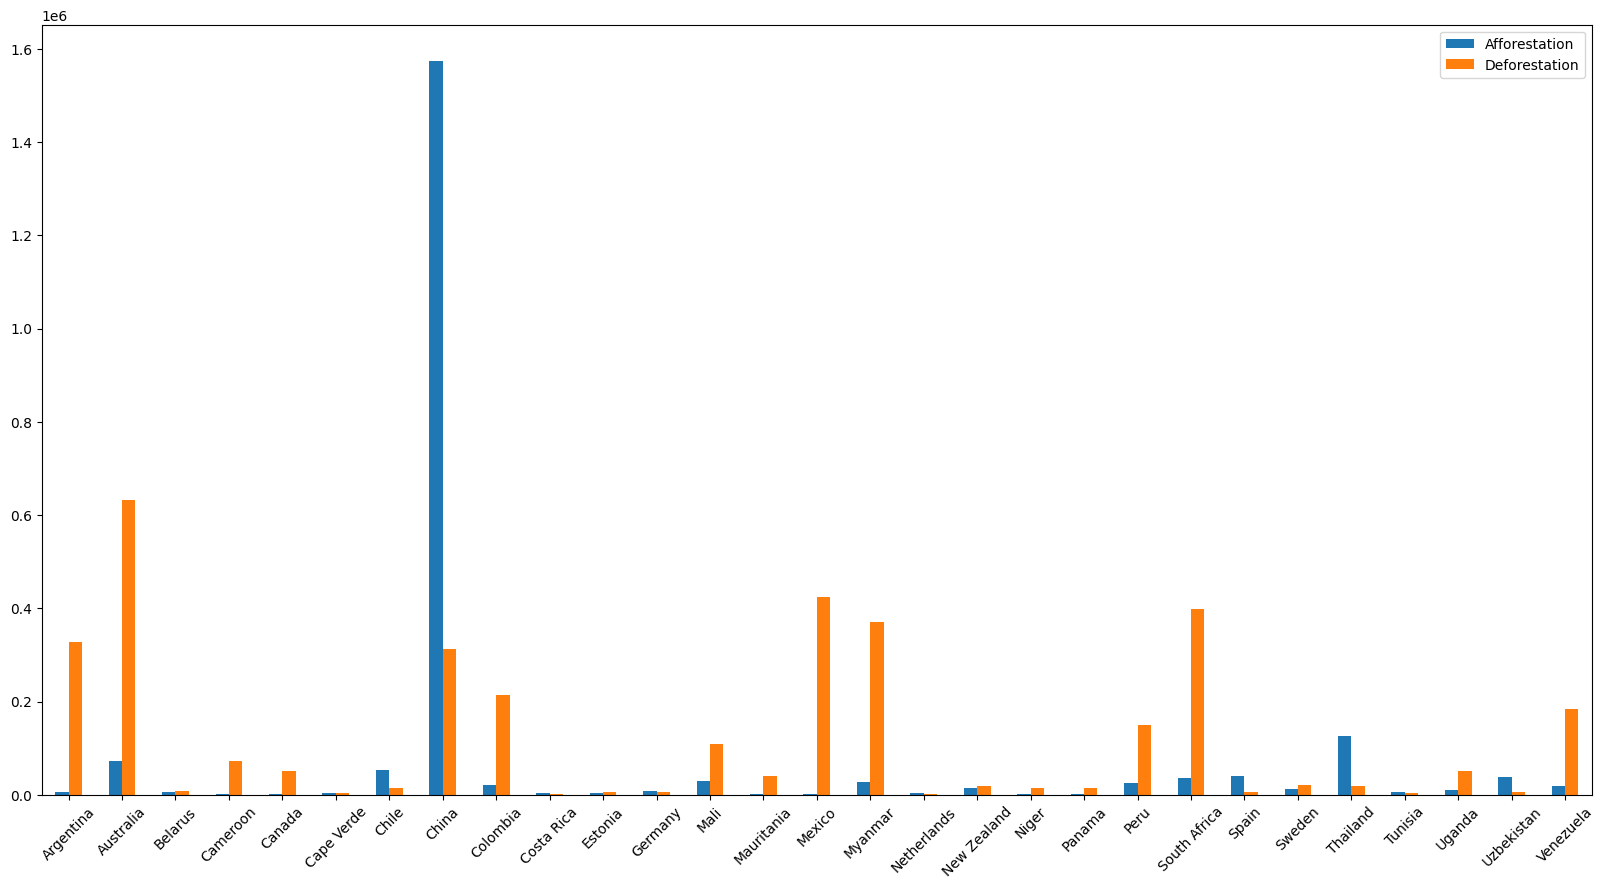

In [37]:
df_forest_cover.plot.bar(rot=45,figsize=(20,10))

### United States

In [38]:
filtered_df_US = combined_df[combined_df['Entity'] == "United States"]

3
3
3


array([<Axes: ylabel='Afforestation'>], dtype=object)

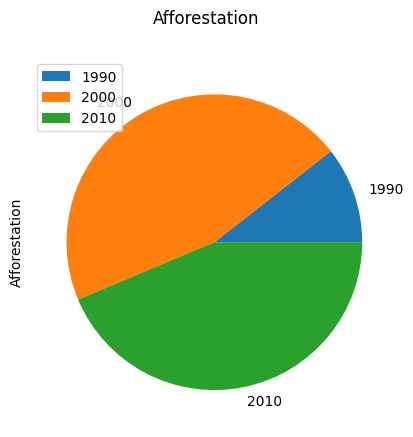

In [39]:
Afforestation = list(filtered_df_US['Afforestation'])
print(len(Afforestation))
Deforestation = list(filtered_df_US['Deforestation'])
print(len(Deforestation))
index = list(filtered_df_US["Year"])
print(len(index))
# df = pd.DataFrame({'Afforestation': Afforestation,'Deforestation': Deforestation}, index=index)
df_aforest = pd.DataFrame({'Afforestation': Afforestation}, index=index)
df_aforest.plot.pie(subplots=True,title="Afforestation")

In [40]:
df_deforest = pd.DataFrame({'Deforestation': Deforestation}, index=index)
df_deforest.head()

,Deforestation
1990,0
2000,0
2010,0
